Author: Ziqing Yuan, Xiaoyue Zhu, Yunwei Zhang

STEP 1: 
define units of analysis
We did a survey on how many countries the subjects visited.The results of the survey  The sample is 23 students graduating from undergraduate institutions in 2021. 
Node in our network: Each node represents a person
Edge in our network: Two people have been to a common country. The more countries they have visited together, the greater the weight of the edge.

354


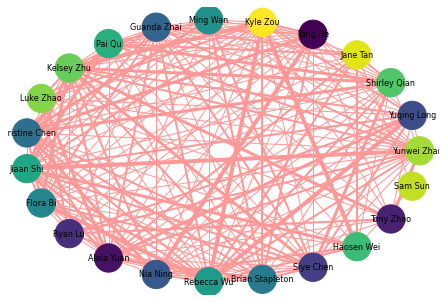

<Figure size 432x288 with 0 Axes>

In [4]:
# STEP 2: Visualize the network.
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def calc(lst1,lst2):
    ans = 0
    for val in lst1:
        if val in lst2:
            ans = ans+1
    return ans

# Data processing
df = pd.read_excel("data.xlsx")
name_country = df.loc[:,["Name","Country"]]
name_country["Country"] = (name_country["Country"]).map(lambda x: x.split(","))  

name = list(name_country["Name"])
country = list(name_country["Country"])
ans = set()
#define the number of identical countries visited by every two individuals among 23 subjects
for i in range(len(name)):
    for j in range(len(name)):
        if i != j:
            l = calc(country[i],country[j])
            if l != 0:
                ans.add((name[i],name[j],l)) #one edge between two subjects
edges = list(ans)
print(len(edges))
#find weight
v = [x[2] for x in edges]
g = nx.MultiGraph()
g.add_edges_from(edges)
nx.draw_circular(g,nodelist=name,with_labels=True,
                 font_size=8,node_size=800,
                 node_color=range(23),edge_color="#FF9998",
                 edge_cmap=plt.cm.Dark2,width=v)


plt.show()
plt.savefig('lp.png')

In [5]:
# STEP3: Describe the global network properties
# number of vertices
print("Number of vertices：",len(name))
# number of edges
print("Number of edges：",len(edges))
# max weights and min weights
print("Max weights：",max(v))
print("Min weights：",min(v))

Number of vertices： 23
Number of edges： 354
Max weights： 4
Min weights： 1


STEP4: Describe vertices
1.degree: degree means the number of connecting lines for each node.
Because we calculated the relationship between two subjects two times, in other word, we caculated the number of edge between two subjects two times.So we use 0.5 to calculate. 

In [6]:
#step 4
import pprint as pp
degree_dict = {}
for n in name:
    degree_dict[n] = 0
for edge in edges:
    for n in edge:
        if n in degree_dict.keys():
            degree_dict[n] += 0.5
print("degree ：")
pp.pprint(degree_dict)

degree ：
{'Alaia Yuan': 20.0,
 'Brian Stapleton': 15.0,
 'Christine Chen': 17.0,
 'Flora Bi': 18.0,
 'Guanda Zhai': 21.0,
 'Haosen Wei': 10.0,
 'Jane Tan': 11.0,
 'Jiaan Shi': 18.0,
 'Kelsey Zhu': 19.0,
 'Kyle Zou': 21.0,
 'Luke Zhao': 10.0,
 'Ming Wan': 14.0,
 'Nia Ning': 16.0,
 'Pai Qu': 15.0,
 'Rebecca Wu': 21.0,
 'Ryan Lu': 12.0,
 'Sam Sun': 2.0,
 'Shirley Qian': 17.0,
 'Siye Chen': 16.0,
 'Tony Zhao': 10.0,
 'Yang He': 19.0,
 'Yunwei Zhang': 19.0,
 'Yuqing Long': 13.0}


STEP5: detect different communities
The division is made according to whether or not the subjects have had study abroad experience, where yellow is for those with study abroad experience, which can be seen as relatively compact. In the 'Type' feature of data.xlsx, 1 means subjects who have had study abroad experience, 0 means subjects who have never study abroad. 

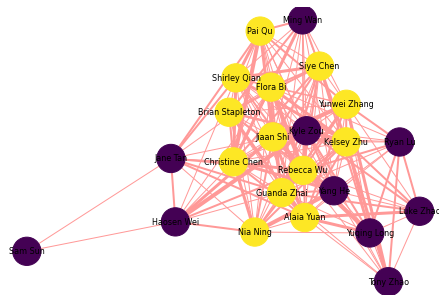

In [15]:
#step 5
type = list(df["Type"])
g = nx.MultiGraph()
g.add_edges_from(edges)
nx.draw(g,nodelist=name,with_labels=True,
        font_size=8,node_size=800,
        node_color=type,edge_color="#FF9998",
        edge_cmap=plt.cm.Dark2,width=v)
plt.show()

In [20]:
# STEP6: Discuss a few important cases 
# Study Abroad and Non-Study Abroad
count = {"studyabroad":0,"Non-study abroad":0}
for i in range(len(name)):
    if type[i] == 1:
        count["studyabroad"] += degree_dict[name[i]]
    else:
        count["Non-study abroad"] += degree_dict[name[i]]
pp.pprint(count)
# the degree of subjects who had study abroad experience is higher than the degree of subjects who have never study abroad.

{'Non-study abroad': 122.0, 'studyabroad': 232.0}


In [19]:
# STEP7: Infer the relationship between network properties
# 1 紧密中心性 节点V到达其他节点的难易程度，也就是到其他所有节点距离的平均值的倒数。这个数字越大说明这个点的接近中心度越高。
compact_centrality = {}
for n in name:
    compact_centrality[n] = 0
for edge in edges:
    for n in edge:
        if n in compact_centrality.keys():
            compact_centrality[n] += edge[2]
for key,value in compact_centrality.items():
    compact_centrality[key] = 22/(compact_centrality[key]/2)
print("各个点的紧密中心性为：")
pp.pprint(compact_centrality)
# 2 留学与非留学的紧密中心性对比
compact_count = {"studyabroad":0,"Non-study abroad":0}
for i in range(len(name)):
    if type[i] == 1:
        compact_count["studyabroad"] += compact_centrality[name[i]]
    else:
        compact_count["Non-study abroad"] += compact_centrality[name[i]]
print("留学与非留学的紧密中心性统计：",compact_count)
# 留学生更加集中在中心

各个点的紧密中心性为：
{'Alaia Yuan': 0.5116279069767442,
 'Brian Stapleton': 1.0476190476190477,
 'Christine Chen': 0.88,
 'Flora Bi': 0.7857142857142857,
 'Guanda Zhai': 0.6875,
 'Haosen Wei': 1.6923076923076923,
 'Jane Tan': 1.5714285714285714,
 'Jiaan Shi': 0.7333333333333333,
 'Kelsey Zhu': 0.5116279069767442,
 'Kyle Zou': 0.6470588235294118,
 'Luke Zhao': 2.2,
 'Ming Wan': 1.5714285714285714,
 'Nia Ning': 1.0476190476190477,
 'Pai Qu': 1.1,
 'Rebecca Wu': 0.43137254901960786,
 'Ryan Lu': 1.375,
 'Sam Sun': 11.0,
 'Shirley Qian': 0.6111111111111112,
 'Siye Chen': 0.9166666666666666,
 'Tony Zhao': 2.2,
 'Yang He': 0.6111111111111112,
 'Yunwei Zhang': 0.8148148148148148,
 'Yuqing Long': 1.2222222222222223}
留学与非留学的紧密中心性统计： {'studyabroad': 10.079006669851404, 'Non-study abroad': 24.090556992027583}


In [8]:
# STEP8: Draw some conclusions about this network.
# 研究留学与非留学去过国家对比
country_count = {"International":0,"Non international":0}
for i in range(len(name)):
    if type[i] == 1:
        country_count["International"] += len(country[i])
    else:
        country_count["Non international"] += len(country[i])
print("留学与非留学国家统计数",country_count)
# 留学生去过的国家为非留学生去过的国家的2倍以上

留学与非留学国家统计数 {'International': 67, 'Non international': 28}
